In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
import glob

In [2]:
#신경망 클래스의 정의(은닉계층 하나)
class neuralNetwork:
    
    #신경망 초기화하기
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        '''
        가중치 행렬 wih와 who
        배열 내 가중치는 w_i_j로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        w11 w21
        w12 w22 등'''
        self.wih=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))   #정규분포로 더욱 정교한 가중치 설정
        self.who=np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        #학습률
        self.lr=learningrate
        
        #활성화 함수로 시그모이드 함수를 이용
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        
        
        
        self.activation_function = lambda x: sigmoid(x)
            
        pass
    #신경망 학습시키기
    def train(self, inputs_list,targets_list):
        #입력 리스트를 2차원의 행렬로 반환
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who,hidden_outputs)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        #출력 계층의 오차는(실제값-계산값)
        output_errors = targets-final_outputs
        #은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해서 계산
        hidden_errors = np.dot(self.who.T,output_errors)
        
        #은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who+= self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs))
        
        #입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih+= self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),np.transpose(inputs))
        
        pass
    
    #신경망 질의하기
    def query(self, input_list):
        
        #입력 리스트를 2차원 행렬로 변환
        inputs=np.array(input_list, ndmin=2).T
        
        #은닉 계층에서 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who,hidden_outputs)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
#신경망 클래스의 정의(은닉계층2개)
class neuralNetwork2:
    
    #신경망 초기화하기
    def __init__(self,inputnodes,hiddennodes,hiddennodes2,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.hnodes2=hiddennodes2
        self.onodes=outputnodes
        
        '''
        가중치 행렬 wih와 who
        배열 내 가중치는 w_i_j로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        w11 w21
        w12 w22 등'''
        self.wih=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))   #정규분포로 더욱 정교한 가중치 설정
        self.who=np.random.normal(0.0,pow(self.hnodes2,-0.5),(self.hnodes2,self.hnodes))
        self.who2=np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes2))
        
        #학습률
        self.lr=learningrate
        
        #활성화 함수로 시그모이드 함수를 이용
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        
        
        
        self.activation_function = lambda x: sigmoid(x)
            
        pass
    #신경망 학습시키기
    def train(self, inputs_list,targets_list):
        #입력 리스트를 2차원의 행렬로 반환
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        
        # 은닉 계층2로 받는 신호 계산
        hidden_inputs2 = np.dot(self.who,hidden_outputs)
        #은닉 계층2에서 나가는 신호 계산
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who2,hidden_outputs2)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        #출력 계층의 오차는(실제값-계산값)
        output_errors = targets-final_outputs
        #은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해서 계산
        hidden_errors2 = np.dot(self.who2.T,output_errors)
        hidden_errors = np.dot(self.who.T,hidden_errors2)
        
        
        #은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who2+= self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs2))
        
        #은닉 계층2와 은닉 계층 간의  가중치 업데이트
        self.who += self.lr*np.dot((hidden_errors2*hidden_outputs2*(1.0-hidden_outputs2)),np.transpose(hidden_outputs))
        
        #입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih+= self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),np.transpose(inputs))
        
        pass
    
    #신경망 질의하기
    def query(self, input_list):
        
        #입력 리스트를 2차원 행렬로 변환
        inputs=np.array(input_list, ndmin=2).T
        
        #은닉 계층에서 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        
        # 은닉 계층2로 받는 신호 계산
        hidden_inputs2 = np.dot(self.who,hidden_outputs)
        #은닉 계층2에서 나가는 신호 계산
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who2,hidden_outputs2)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs

***correct_label :  [0]


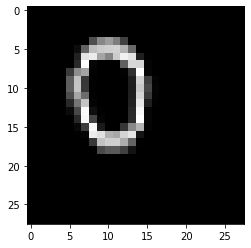

***correct_label :  [0, 1]


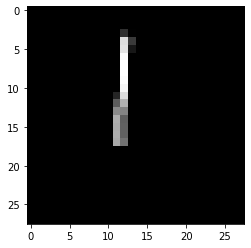

***correct_label :  [0, 1, 2]


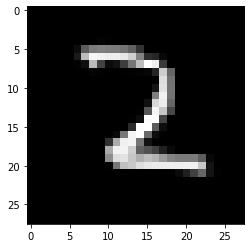

***correct_label :  [0, 1, 2, 3]


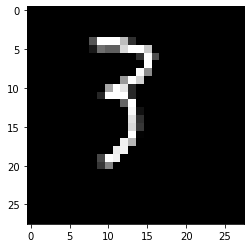

***correct_label :  [0, 1, 2, 3, 4]


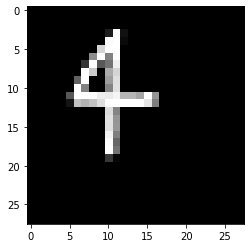

***correct_label :  [0, 1, 2, 3, 4, 5]


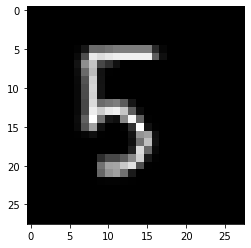

***correct_label :  [0, 1, 2, 3, 4, 5, 6]


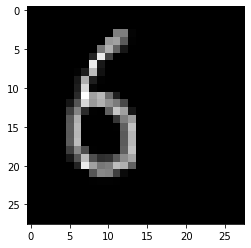

***correct_label :  [0, 1, 2, 3, 4, 5, 6, 7]


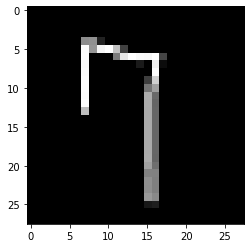

***correct_label :  [0, 1, 2, 3, 4, 5, 6, 7, 8]


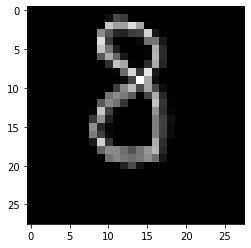

***correct_label :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


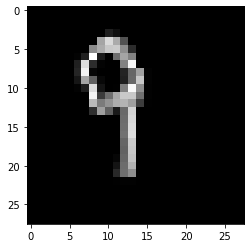

In [4]:
correct_label=[]
image_list=[]
for image_file_name in glob.glob('my?.png'):
    correct_label.append(int(image_file_name[-5:-4]))
    print("***correct_label : ",correct_label)
    
    image_array=imageio.imread(image_file_name)
    image_array=image_array[:,:,0]
    image_data = 255.0-image_array.reshape(784)
    image_list.append((image_data/255.0*0.99)+0.01)
    plt.imshow(image_array,cmap='Greys',interpolation='None')
    plt.show()

In [5]:
final_image_list=[]
for i in range(len(image_list)):
    final_image_list.append(str(image_list[i].tolist())) # 리스트 형식으로 바꿔서 저장
for j in range(len(final_image_list)): 
    final_image_list[j] = final_image_list[j].replace('[','').replace(']','')# 맨 앞에 불순물 존재하는 기호 제거
final_image_list

['0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.24682352941176472, 0.4525882352941177, 0.5263529411764706, 0.41764705882352937, 0.20800000000000002, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05270588235294118, 0.3205882352941177, 0.635058

In [6]:
training_data_file = open("mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [7]:
input_nodes = 784
hidden_nodes=400
hidden_nodes2=200
output_nodes=10
learning_rate=0.01
n=neuralNetwork2(input_nodes,hidden_nodes,hidden_nodes2,output_nodes,learning_rate)

In [8]:
# train
epochs=5
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
        targets=np.zeros(output_nodes)+0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs,targets)
        pass

In [9]:
# test
scorecard=[]
idx=0
for record in final_image_list:
    all_values = record.split(',')
    outputs = n.query(np.asfarray(all_values)) # 그 전에 처리를 했으므로 array 형태로만 변환
    label=np.argmax(outputs)
    if label == correct_label[idx]:
        scorecard.append(1)
    else:
        scorecard.append(0)
    idx+=1
scorecard_array=np.asarray(scorecard)

In [10]:
print(scorecard_array)
print('score is : ',scorecard_array.sum()/scorecard_array.size)

[0 0 1 0 0 1 0 1 0 0]
score is :  0.3


# 직접 쓴 손글씨

In [11]:
images=[]
for image_file_name in glob.glob('b?.png'):
    images.append(imageio.imread(image_file_name))

***correct_label :  [1]


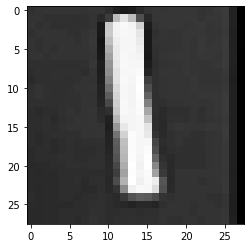

***correct_label :  [1, 2]


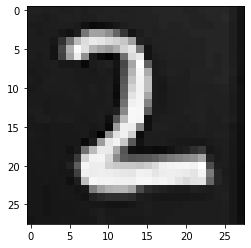

***correct_label :  [1, 2, 4]


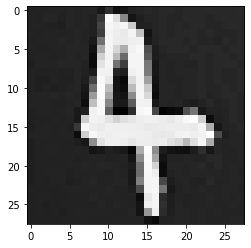

***correct_label :  [1, 2, 4, 7]


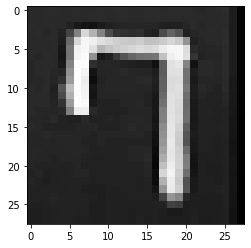

***correct_label :  [1, 2, 4, 7, 9]


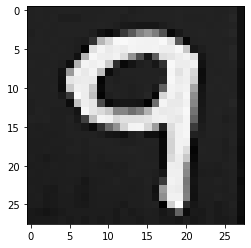

In [12]:
correct_label2=[]
image_list2=[]
for image_file_name in glob.glob('b?.png'):
    correct_label2.append(int(image_file_name[-5:-4]))
    print("***correct_label : ",correct_label2)
    
    image_array=imageio.imread(image_file_name)
    image_array=image_array[:,:,0]
    image_data = 255.0-image_array.reshape(784)
    image_list2.append((image_data/255.0*0.99)+0.01-0.09) # 도화지가 약간 회색 빛을 띄므로 그림판의 흰색과 비슷하게 만들기 위해
    # min~max 0~1 이기 때문에 위배되지 않는다.
    plt.imshow(image_array,cmap='Greys',interpolation='None')
    plt.show()

In [13]:
final_image_list2=[]
for i in range(len(image_list2)):
    final_image_list2.append(str(image_list2[i].tolist())) # 리스트 형식으로 바꿔서 저장
for j in range(len(final_image_list2)): 
    final_image_list2[j] = final_image_list2[j].replace('[','').replace(']','')# 맨 앞에 불순물 존재하는 기호 제거
final_image_list2

['0.12964705882352942, 0.1335294117647059, 0.13741176470588237, 0.13741176470588237, 0.13741176470588237, 0.13741176470588237, 0.13741176470588237, 0.1335294117647059, 0.13741176470588237, 0.13741176470588237, 0.12188235294117647, 0.0947058823529412, 0.07917647058823532, 0.08694117647058824, 0.11800000000000002, 0.1335294117647059, 0.14129411764705885, 0.13741176470588237, 0.14129411764705885, 0.14129411764705885, 0.14129411764705885, 0.14129411764705885, 0.1335294117647059, 0.13741176470588237, 0.1451764705882353, 0.15294117647058825, 0.09858823529411764, 0.01317647058823529, 0.1335294117647059, 0.1335294117647059, 0.12964705882352942, 0.12964705882352942, 0.12964705882352942, 0.12964705882352942, 0.12576470588235297, 0.12964705882352942, 0.1335294117647059, 0.11411764705882355, 0.15294117647058825, 0.4829411764705882, 0.6149411764705882, 0.47905882352941176, 0.19564705882352942, 0.11023529411764707, 0.14129411764705885, 0.14129411764705885, 0.14129411764705885, 0.14129411764705885, 0

In [14]:
print(np.min(image_list2))
print(np.max(image_list2))
# 0과 1사이

0.009294117647058814
0.8323529411764705


In [15]:
scorecard=[]
idx=0
for record in final_image_list2:
    all_values = record.split(',')
    outputs = n.query(np.asfarray(all_values)) # 그 전에 처리를 했으므로 array 형태로만 변환
    label=np.argmax(outputs)
    print(label)
    if label == correct_label2[idx]:
        scorecard.append(1)
    else:
        scorecard.append(0)
    idx+=1
scorecard_array=np.asarray(scorecard)
print('score is : ',scorecard_array.sum()/scorecard_array.size)

8
2
8
8
8
score is :  0.2


In [16]:
correct_label2

[1, 2, 4, 7, 9]

# 결론: 생각보다 결과 예측이 안된다..overfitting 예상

# 201600779 김영민